KINGS COUNTY HOUSE SALES ANALYSIS.

Please fill out:
* Student names:
1. Benson Kamau
2. Kevin Muchori
3. Nancy Chelangat
4. Breden Mugambi
5. Sally Kinyanjui

* Student pace: Full time

* Scheduled project review date/time: N/A

* Instructor name: Nikita Njoroge


BUSINESS UNDERSTANDING

This study aims to explore the relationship between key factors such as renovations, bedrooms, and other property attributes with housing prices in King County. By leveraging on the dataset available, we seek to uncover the specific impact of renovations on property valuations, considering variables such as the extent of renovations.

Additionally, we aim to investigate how the number of bedrooms, bathrooms, along with other structural features like square footage and lot size, view  influences housing prices.
This can help homeowners to add functionality and beauty to their property while simultaneously boosting its resale value.

Main Objective

To build and evaluate models using various combinations of the available features in the King County.


Specific Objectives

1. To evaluate how the number of floors impacts the price of a house in King County.
2. To determine how the number of bedrooms impacts the price of a house in King County.
3. To examine the impact the number of bathrooms has on the price of a house in King County.
4. To assess the impact of renovations on the price of a house in King County.
5. To evaluate which combinations of the available features in the dataset are the most impactful features for predicting sale price.


DATA UNDERSTANDING

This project analyzes data about homes sold in King County, Washington between May 2014 and May 2015 in order to make recommendations to relevant stakeholders.

This dataset is housed in the kc_house_data.csv file within the project's data folder and the columns outlined in the accompanying column_names.md file.


In [1]:
#This code section allows for reading of files from Google drive
#It is only applicable when working with IDEs that cannot read the data in the github files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import the relevant library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

# Define the DataFrame in the global scope
df = pd.DataFrame()

#create a function that loads data and gets the info about the data.
def load_and_get_info(file_path):
    """
    Load data from a CSV file and get information about the DataFrame.

    Parameters:
    - file_path (str): Path to the CSV file.

    Returns:
    - df_info (str): Information about the DataFrame.
    """
    # Load data
    global df
    df = pd.read_csv(file_path)

    # Display the first few rows of the DataFrame
    df_head = df.head()

    # Get information about the DataFrame
    df_info = df.info()

    return df_info, df_head

#file_path = 'data/kc_house_data.csv'
file_path = '/content/drive/MyDrive/data/kc_house_data.csv'
data_info, data_head = load_and_get_info(file_path)
print(data_info)
print("\nFirst few rows of the DataFrame:")
data_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


This dataset contains records of 21,597 home sales. It includes:

How much the house sold for

Square footage of the house's living space

Square footage of the lot

Number of floors, bedrooms, and bathrooms

The quality of the view from the house

Whether the house is on a waterfront

The house's grade (relates to construction materials and quality)

The house's condition (relates to age and maintenance)

The year the house was built

The year the house was renovated

The location of the house

The following columns have missing values:
1. waterfront
2. yr_renovated

In [3]:
def check_dtypes(df):
    """
    Check data types and identify the kind of variable for each column in the DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame.

    Returns:
    - dtypes_info (DataFrame): DataFrame containing information about data types and variable types.
    """
    # Get data types of each column
    dtypes = df.dtypes

    # Identify variable types (numeric or categorical) for each column
    variable_types = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            variable_types.append('Numeric')
        else:
            variable_types.append('Categorical')

    # Create DataFrame to store information
    dtypes_info = pd.DataFrame({'Column': dtypes.index, 'Data Type': dtypes.values, 'Variable Type': variable_types})

    return dtypes_info

data_types_info = check_dtypes(df)
print(data_types_info)

           Column Data Type Variable Type
0              id     int64       Numeric
1            date    object   Categorical
2           price   float64       Numeric
3        bedrooms     int64       Numeric
4       bathrooms   float64       Numeric
5     sqft_living     int64       Numeric
6        sqft_lot     int64       Numeric
7          floors   float64       Numeric
8      waterfront    object   Categorical
9            view    object   Categorical
10      condition    object   Categorical
11          grade    object   Categorical
12     sqft_above     int64       Numeric
13  sqft_basement    object   Categorical
14       yr_built     int64       Numeric
15   yr_renovated   float64       Numeric
16        zipcode     int64       Numeric
17            lat   float64       Numeric
18           long   float64       Numeric
19  sqft_living15     int64       Numeric
20     sqft_lot15     int64       Numeric


The data in the columns is further divided into two categories:

1.	Numeric data : id , yr_built , yr_renovated , price , bedrooms , bathrooms , sqft_living , sqft_above , sqft_lot , floors , zipcode , lat , long , sqft_living15 , sqft_lot15

2.	Categorical data : date , waterfront , view , condition , grade , sqft_basement

## Data Preparation.

In [4]:
# Define a custom function to transform the yr_renovated column and drop the column after transformation
def transform_and_drop_yr_renovated(df):
    """
    Transform yr_renovated column to read 'Yes' if there is a year recorded,
    and 'No' if there is no year in the record. Then drop the original
    yr_renovated column.

    Parameters:
    - df (DataFrame): Input DataFrame.

    Returns:
    - df_transformed (DataFrame): Transformed DataFrame with dropped column.
    """
    # Define a custom function to transform the yr_renovated column
    def transform_yr_renovated(value):
        if pd.notnull(value) and value != 0:  # Check if value is not NaN and not equal to 0
            return 'Yes'
        else:
            return 'No'

    # Apply the custom function to transform the yr_renovated column
    df['house_renovation'] = df['yr_renovated'].apply(transform_yr_renovated)

    # Drop the original yr_renovated column
    df = df.drop(columns=['yr_renovated'])

    return df

# Apply the custom function to transform and drop yr_renovated column
df = transform_and_drop_yr_renovated(df)

# Print the transformed DataFrame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,No


Each row represents information about a specific house, and each column provides different characteristics of the houses for example the house with id 7129300520 goes for the price of 221900,has three bedrooms,one bathroom,a squarefeet of 1180,a squarefeet lot of 5650.
This is the same criteria we use in for the other houses.


This function transform_and_drop_yr_renovated(df)  transforms the 'yr_renovated' column in a DataFrame and then drops the original column we now have a column stating whether the house renovation took place or not replacing the column there which was showing what year the renovation took place.

This transformation allows you to categorize whether each house has been renovated ('Yes') or not ('No'), based on the presence or absence of a renovation year in the original 'yr_renovated' column.

The df.head() statement prints the first few rows of the transformed DataFrame to check the result.

checking for null and duplicate values function.

In [5]:
def check_null_and_duplicates(df):
    """
    Check for both null values and duplicated rows in a DataFrame.

    Parameters:
    - df: DataFrame
        The DataFrame to check.

    Returns:
    - info_df: DataFrame
        DataFrame containing information about null values and duplicated rows.
    """
    # Check for null values
    null_values = df.isnull().sum()
    if null_values.sum() > 0:
        print("Null Values:")
        print(null_values)
    else:
        print("No Null Values Found.")

    # Check for duplicated rows
    duplicated_rows = df.duplicated().sum()
    if duplicated_rows > 0:
        print("\nDuplicated Rows Found:", duplicated_rows)
        duplicated_df = df[df.duplicated()]
        print(duplicated_df)
    else:
        print("\nNo Duplicated Rows Found.")
        duplicated_df = pd.DataFrame()  # Empty DataFrame if no duplicates

    # Create a DataFrame to store information
    info_df = pd.DataFrame({
        'Column': null_values.index,
        'Null Count': null_values.values,
        'Duplicated Rows': duplicated_rows
    })
    return info_df
info_df= check_null_and_duplicates(df)
print (info_df)

Null Values:
id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront          2376
view                  63
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
house_renovation       0
dtype: int64

No Duplicated Rows Found.
              Column  Null Count  Duplicated Rows
0                 id           0                0
1               date           0                0
2              price           0                0
3           bedrooms           0                0
4          bathrooms           0                0
5        sqft_living           0                0
6           sqft_lot           0                0
7             floors  

'waterfront' column has 2376 null values.

'view' column has 63 null values.

All other columns have zero null values.

No Duplicated Rows Found: This line indicates that there are no duplicated rows in DataFrame.

## Function for dropping duplicates,nulls and column names and replacing values.
So we will use the Python function 'dropper'. This function is used for cleaning a dataframe by dropping duplicates,null values and separated columns.In the function below we also include replacing the NaN values in our waterfront column with None.

In [6]:
def dropper(df, one=None, two=None, three=None):
    '''
    Input: DataFrame, request 1,request 2, request 3
    requests:
    'duplicates' to drop duplicates
    'nulls' to drop null values
    list containing df column names l = ['','','']
    '''
    request = [one,two,three]
    if 'duplicates' in request:
        df = df.drop_duplicates()
    if 'nulls' in request:
        df = df.dropna()
    for req in request:
        if isinstance(req, list):
            df = df.drop(columns=req, axis=1).reset_index(drop=True)
    return(df)


print("First few rows of the DataFrame:")

#Changing values for our column waterfront
# Assuming your DataFrame is named df
df['waterfront'] = df['waterfront'].fillna('NONE')
print(df['waterfront'].value_counts())

df.head(10)

First few rows of the DataFrame:
waterfront
NO      19075
NONE     2376
YES       146
Name: count, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,NONE,...,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,No
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930,No
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,98003,47.3097,-122.327,2238,6819,No
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,98198,47.4095,-122.315,1650,9711,No
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,98146,47.5123,-122.337,1780,8113,No
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,98038,47.3684,-122.031,2390,7570,No


After finding the number of null values in the previous function, we have now dropped our null values using df =df.dropna()

In this dataframe, we have changed the output of waterfront column from NaN to None using the fill.na().
the column waterfront has the data type interger.

'NO': There are 19075 occurrences of 'NO' in the 'waterfront' column. This indicates that these properties do not have a waterfront view.

'NONE': There are 2376 occurrences of 'NONE' in the 'waterfront' column. This likely indicates that these records originally had missing values (NaN) for the waterfront attribute, and they have been replaced with the string 'NONE'.

'YES': There are 146 occurrences of 'YES' in the 'waterfront' column. This indicates that these properties have a waterfront view.

## Checking for outliers.

Outliers are simply data points that differ from the rest of the dataset.

They may distort statistical measures leading to misinterpretation of data.

For us to check for outliers we are needed to focus on the columns such as "price","bedrooms","bathrooms","sqft_living","sqft_lot", which are numerical columns.
We will use the function 'detect_outliers' to identify the outliers.

In [7]:
import pandas as pd
import numpy as np

def detect_outliers(df, features):
    """
    Detect outliers in the specified numeric features of the dataframe.

    Parameters:
    - df: DataFrame containing the data.
    - features: List of numeric feature names to check for outliers.

    Returns:
    - Dictionary containing outlier indices for each feature.
    """
    outlier_indices = {}
    for feature in features:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        # Calculate the outlier step
        outlier_step = 1.5 * IQR
        # Determine outliers
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices[feature] = outlier_list_col
    return outlier_indices

# Example usage:
# Numeric features to check for outliers
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
# Detect outliers
outliers = detect_outliers(df, numeric_features)
# Print outlier indices for each feature
for feature, indices in outliers.items():
    print(f"Outliers in {feature}: {indices}")


Outliers in price: Index([    5,    21,    49,    69,   125,   153,   216,   246,   269,   270,
       ...
       21509, 21514, 21516, 21524, 21535, 21552, 21560, 21574, 21581, 21584],
      dtype='int64', length=1158)
Outliers in bedrooms: Index([  154,   209,   232,   239,   264,   331,   350,   465,   486,   527,
       ...
       21170, 21210, 21224, 21310, 21316, 21359, 21427, 21503, 21506, 21536],
      dtype='int64', length=530)
Outliers in bathrooms: Index([    5,    75,   235,   270,   300,   419,   450,   471,   509,   527,
       ...
       21490, 21498, 21504, 21514, 21516, 21535, 21545, 21560, 21577, 21584],
      dtype='int64', length=561)
Outliers in sqft_living: Index([    5,    70,   115,   153,   239,   269,   270,   300,   313,   314,
       ...
       21505, 21509, 21514, 21516, 21524, 21535, 21545, 21560, 21574, 21584],
      dtype='int64', length=571)
Outliers in sqft_lot: Index([    5,    12,    21,    36,    41,    49,    60,    69,    70,    74,
       ...
    

The above output indicates that outliers were detected in the price column and the indices of the outliers.

There are 1158 outliers in price. This means there are 1158 houses whose prices are significantly different from the rest in the dataset.

There are 530 outliers in the number of bedrooms. These are houses with an unusual number of bedrooms compared to others.

There are 561 outliers in the number of bathrooms. Similar to bedrooms, these houses have an unusual number of bathrooms.

There are 571 outliers in the size of the living area. These houses have an exceptionally large or small living area compared to others.

There are outliers in the size of the lot as well, but the number of outliers is so large that it's difficult to mention the exact count. These houses have unusually large or small lots compared to others.

We are going ahead to drop the outliers in our dataset.

In [8]:
def drop_outliers(df, outliers):
    """
    Drop outliers from the DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - outliers: Dictionary containing outlier indices for each feature.

    Returns:
    - DataFrame with outliers removed.
    """
    # Combine outlier indices from all features
    outlier_indices = []
    for indices in outliers.values():
        outlier_indices.extend(indices)
    # Drop duplicate indices
    outlier_indices = list(set(outlier_indices))
    # Drop outliers from DataFrame
    df_cleaned = df.drop(outlier_indices)
    return df_cleaned

# Example usage:
# Numeric features to check for outliers
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
# Detect outliers
outliers = detect_outliers(df, numeric_features)
# Drop outliers
df_cleaned = drop_outliers(df, outliers)
df_cleaned

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,NONE,...,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509,No
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200,No
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007,No
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NONE,NONE,...,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287,No


This drop_outliers function takes the DataFrame df and the outlier indices obtained from detect_outliers function as inputs and returns a DataFrame with the outliers removed.







In [9]:
# Step 1: Define numeric features
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# Step 2: Detect outliers
outliers = detect_outliers(df, numeric_features)

# Step 3: Drop outliers
df_cleaned = drop_outliers(df, outliers)

# Optional: Check the shape of the cleaned DataFrame
print("Shape of original DataFrame:", df.shape)
print("Shape of cleaned DataFrame:", df_cleaned.shape)


Shape of original DataFrame: (21597, 21)
Shape of cleaned DataFrame: (17702, 21)


This output shows that we managed to remove outliers from the dataframe because initially the dataframe has 21597 rows and after cleaning the data and removing the outliers, we were left with 17702. So a  significant portion of the data points were identified as outliers and were removed.

In [10]:
df_cleaned.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                53
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
house_renovation     0
dtype: int64

The view column appears to have 53 null values. So I went ahead and dropped them using the .dropna() function.

In [11]:
df_cleaned.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,NONE,...,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509,No
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200,No
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007,No
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NONE,NONE,...,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287,No


From the cleaned dataframe I dropped  the null values.

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17702 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17702 non-null  int64  
 1   date              17702 non-null  object 
 2   price             17702 non-null  float64
 3   bedrooms          17702 non-null  int64  
 4   bathrooms         17702 non-null  float64
 5   sqft_living       17702 non-null  int64  
 6   sqft_lot          17702 non-null  int64  
 7   floors            17702 non-null  float64
 8   waterfront        17702 non-null  object 
 9   view              17649 non-null  object 
 10  condition         17702 non-null  object 
 11  grade             17702 non-null  object 
 12  sqft_above        17702 non-null  int64  
 13  sqft_basement     17702 non-null  object 
 14  yr_built          17702 non-null  int64  
 15  zipcode           17702 non-null  int64  
 16  lat               17702 non-null  float64
 17

From the information above obtained from the kc.house data_csv  after cleaning my data,I was able to observe the following:

The total number of entries was 17702.

There was both Numerical and categorical data:

a)Numerical data 13

b)categorical data 8

## **DATA ANALYSIS**

This section deals with the objectives of the project, and it involves thorough analysis of the data present and visualization to establish relationships and behaviors between elements in the table

Objective 1: To evaluate how the number of floors impacts the price of a house in King County  

Following the first objective , we aim to find out of the number of floors impact the price of the houses in King county. We first check the contents of the "floors" column and using a sample size of 50, we can view the contents contained.
We then check the contents of the "price column using the same sample size for easier viewing. During visualization, all data points will be used

In [13]:
df_cleaned['floors'].sample(50)

21562    2.0
17707    1.5
14731    2.0
11962    1.5
14904    2.0
13978    1.0
689      1.0
19831    2.0
17685    2.0
4575     1.0
15626    1.0
8890     1.0
6408     1.0
212      1.0
16175    2.0
980      1.0
2127     1.0
18224    2.0
14049    1.5
20182    2.0
8164     1.0
8722     1.0
8765     2.0
2544     2.0
1975     2.0
4156     1.0
7873     1.0
9395     2.0
21250    2.0
15000    1.0
3355     2.0
10226    2.0
19242    2.0
5296     2.0
20695    2.0
12992    1.5
19343    1.0
7534     1.0
6128     2.0
14690    2.0
1521     1.0
12348    1.0
9848     1.0
16390    1.0
6376     2.0
3094     1.0
7294     2.0
94       1.0
10194    1.0
3992     1.0
Name: floors, dtype: float64

In [14]:
df_cleaned['price'].sample(50)

21114    486940.0
8831     485000.0
10984    757000.0
6261     300000.0
5967     315000.0
9127     304000.0
12978    350000.0
20250    625000.0
6104     154950.0
7349     849000.0
16960    580000.0
4459     500000.0
17930    906000.0
18758    322500.0
15229    480000.0
9713     680000.0
11206    425000.0
7163     280017.0
20040    539000.0
17375    525000.0
3780     440000.0
19274    675000.0
14539    365000.0
19449    835000.0
13086    250000.0
21161    663000.0
21272    773000.0
8416     245000.0
17490    300000.0
10122    219000.0
11184    209000.0
2687     461000.0
9292     612500.0
4348     259950.0
19888    615000.0
21111    365000.0
9208     310000.0
14111    325000.0
138      382500.0
17250    255000.0
20480    847093.0
7782     245000.0
4439     812000.0
12902    350000.0
12464    222500.0
8        229500.0
10293    601000.0
12163    490000.0
5843     254000.0
13116    516000.0
Name: price, dtype: float64

Next, we sort the data in ascending order in order to gain an easier progression of the floor and for easier readability. After that, we can plot a scatter plot to visually see the relationship between floors and pricing in houses in King County

In [15]:
sorted_df_floors = df_cleaned.sort_values(by=['floors'])
sorted_df_price = df_cleaned.sort_values(by=['price'])
sorted_df_floors['floors']

0        1.0
7812     1.0
7814     1.0
12858    1.0
7816     1.0
        ... 
15410    3.5
10066    3.5
14871    3.5
11582    3.5
20292    3.5
Name: floors, Length: 17702, dtype: float64

<ipython-input-31-668a72bbf327>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cividis')  # Or any other colormap you prefer
<ipython-input-31-668a72bbf327>:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Price Range')  # Add a colorbar legend


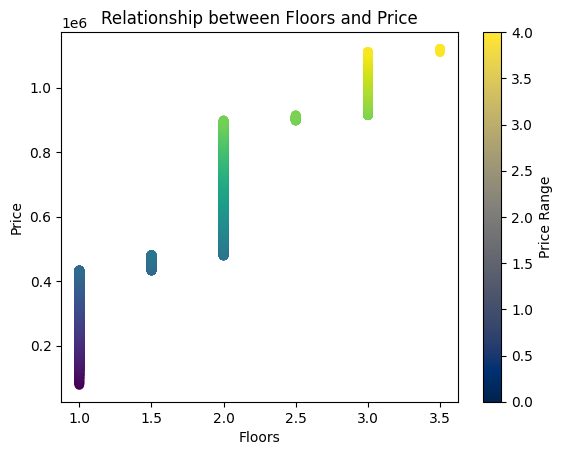

In [31]:
#Scatter plot
color_ranges = [0, 1, 2, 3, 4]  # Define price ranges for coloring
colors = ['red', 'yellow','orange', 'green']  # Define colors for each range

#A colormap based on price ranges and colors
cmap = plt.cm.get_cmap('cividis')  # Or any other colormap you prefer
norm = plt.Normalize(vmin=min(color_ranges), vmax=max(color_ranges))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Color points based on price ranges
plt.scatter(sorted_df_floors['floors'], sorted_df_price['price'], c=norm(sorted_df_price['price']))
plt.colorbar(sm, label='Price Range')  # Add a colorbar legend

plt.xlabel('Floors')
plt.ylabel('Price')
plt.title('Relationship between Floors and Price')
plt.show()

As visually represented, most houses have wither 1.0 floors or 2.0 floors, with a decent amount of houses with 3 floors, while a miniscule number have 1.5, 2.5 or 3.5 floors. The bugger the number of floors, the higher the price, with majority of people opting for the houses with 2.0 floors

**Objective 2**: To determine how the number of bedrooms impacts the price of a house in King County  

Here, we aim to fin out if the number of bedrooms impact the pricing of houses in King County. We first check the contents, arrange them in a workable state (either ascending or descending) and then plot the outcome for easier visualization

In [21]:
#checking the contents in the "bedrooms" column
df_cleaned['bedrooms']

0        3
1        3
2        2
3        4
4        3
        ..
21592    3
21593    4
21594    2
21595    3
21596    2
Name: bedrooms, Length: 17702, dtype: int64

In [22]:
#sorting them in ascending order
sorted_df_bedrooms = df_cleaned.sort_values(by=['bedrooms'])
sorted_df_bedrooms['bedrooms']

21596    2
7098     2
17304    2
3155     2
7096     2
        ..
20198    5
20195    5
5610     5
20216    5
17098    5
Name: bedrooms, Length: 17702, dtype: int64

<ipython-input-25-862d7aed0138>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer


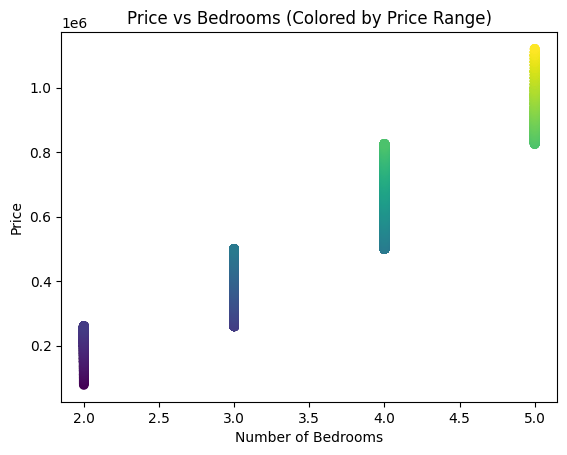

In [25]:
#Plotting
color_ranges = [0, 1, 2, 3, 4]  # Define price ranges for coloring
colors = ['red', 'yellow','orange', 'green']  # Define colors for each range

# Create a colormap based on price ranges and colors
cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer
norm = plt.Normalize(vmin=min(color_ranges), vmax=max(color_ranges))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Color points based on price ranges
plt.scatter(sorted_df_bedrooms['bedrooms'], sorted_df_price['price'], c=norm(sorted_df_price['price']))

plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms (Colored by Price Range)')
plt.show()

As seen, the higher the number of bedrooms, the higher the pricing, with majority of houses lying between 3 and 4 bedrooms  


**Objective 3**: To examine the impact the number of bathrooms has on the price of a house in King County  
Just like with flooring and bedrooms, we first check the contents of the column, arrange them accordingly , and visualize them against pricing with the appropriate plotting

In [28]:
#Viewing contents
df_cleaned['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21592    2.50
21593    2.50
21594    0.75
21595    2.50
21596    0.75
Name: bathrooms, Length: 17702, dtype: float64

In [29]:
#Sorting in Ascending order
sorted_df_bathrooms = df_cleaned.sort_values(by=['bathrooms'])
sorted_df_bathrooms['bathrooms']

21596    0.75
8588     0.75
12038    0.75
3686     0.75
12997    0.75
         ... 
20663    3.50
13191    3.50
20666    3.50
20650    3.50
8045     3.50
Name: bathrooms, Length: 17702, dtype: float64

<ipython-input-33-9c7ebb6a7663>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer


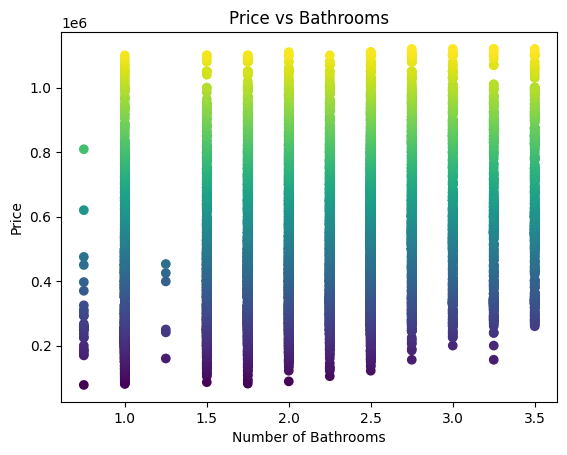

In [33]:
#Plotting
color_ranges = [0, 1, 2, 3, 4]  # Define price ranges for coloring
colors = ['red', 'yellow','orange', 'green']  # Define colors for each range

# Create a colormap based on price ranges and colors
cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer
norm = plt.Normalize(vmin=min(color_ranges), vmax=max(color_ranges))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Color points based on price ranges
plt.scatter(sorted_df_bedrooms['bathrooms'], sorted_df_price['price'], c=norm(sorted_df_price['price']))
#plt.colorbar(sm, label='Floor Range')  # Add a colorbar legend

plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Price vs Bathrooms')
plt.show()

As visually illustrated, there is minimal difference in the number of bathrooms and the pricing. In our data, even houses with as minimum as 0.75 bathrooms can still have a high pricing as other houses with more bathrooms. This illustrates that bathrooms have minimal impact on the pricing of the houses in King County

**Objective 4**: To assess the impact of renovations on the price of a house in King County  
Just like with the others, we begin by examining the content and visualizing them against Price. We don not need to sort the renovations as they are categorical data and therefore do not need sorting

In [35]:
df_cleaned['house_renovation']

0         No
1        Yes
2         No
3         No
4         No
        ... 
21592     No
21593     No
21594     No
21595     No
21596     No
Name: house_renovation, Length: 17702, dtype: object

For the plotting, we average the amount of "Yes" in renovations and plot them with the average amount of the "Price" column. The same Process is also done for the "No" Renovations. The results are then plotted in a bar chart.

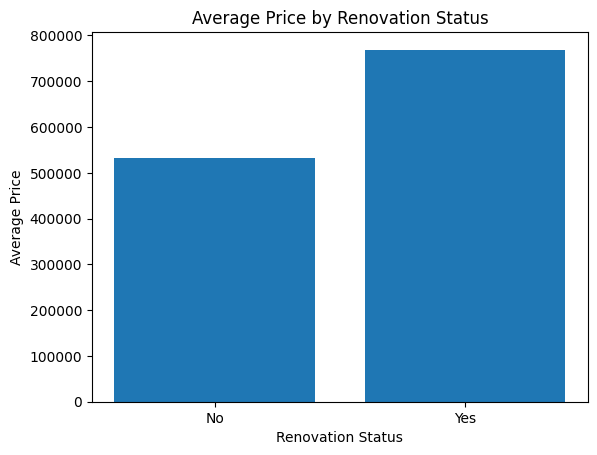

In [36]:
#Plotting
# Calculate average price for each renovation status
price_by_renovation = df.groupby('house_renovation')['price'].mean()

# Extract data for the plot
renovation_groups = price_by_renovation.index.tolist()
average_prices = price_by_renovation.tolist()

# Bar plot
plt.bar(renovation_groups, average_prices)

# Add labels and title
plt.xlabel("Renovation Status")
plt.ylabel("Average Price")
plt.title("Average Price by Renovation Status")

# Show the plot
plt.show()

As seen, The houses that are in the 'yes' category have a higher average price range as compared to the 'no' category. This shows that renovated houses in King County have higher pricing as compared to houses that are not renovated. Therefore, renovated houses are more costly than their conterparts

**Objective 5**:To evaluate which combinations of the available features in the dataset are the most impactful features for predicting sale price.  

